In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing the Ridge Regression
from sklearn.linear_model import Ridge

# Importing the libraries for Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV #-----Randomized Search CV
from sklearn.model_selection import GridSearchCV #----Grid Search CV

# Importing R-Square for model evaluation
from sklearn.metrics import r2_score

In [3]:
# Loading the dataset
admission_data = pd.read_csv("Admission_Preprocess.csv")

# Viewing first 5 rows
admission_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
# Finding shape of datset
admission_data.shape

# Finding basic information about dataset
admission_data.info()

(500, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    float64
 1   TOEFL Score        500 non-null    float64
 2   University Rating  500 non-null    float64
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.4 KB


In [5]:
# Separating the independent and dependent variables
X_data = admission_data.iloc[:,:-1]
y_data = admission_data["Chance of Admit"]

# Finding shape of independent and dependent variables
X_data.shape, y_data.shape

((500, 7), (500,))

In [6]:
# Importing KFold cross-validation for splitting dataset 
from sklearn.model_selection import KFold

# Creating object of KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = None)  #----Performing 5-Fold cross-validation

In [7]:
# Splittting dataset into training and testing part using cross-validation
for train_index, test_index in kf.split(X_data):
    X_train, X_test = X_data.iloc[train_index,:], X_data.iloc[test_index,:]
    y_train, y_test = y_data.iloc[train_index], y_data.iloc[test_index]

# Finding out the shape of training and testing set
X_train.shape, X_test.shape
y_train.shape, y_test.shape

((400, 7), (100, 7))

((400,), (100,))

### Ridge Regression------Randomized SearchCV

In [9]:
# Creating the object of Ridge Regression Class
ridge_reg = Ridge(normalize = True)

In [12]:
# Creating parameter grid for hyper-parameter optimization
param_grid = {"alpha" : np.random.uniform(low=0, high=10, size=(50,)),
             "fit_intercept" : ([True, False]),
             "solver" : (['svd', 'cholesky', 'sparse_cg', 'sag'])}
#----Setting different values for various parameters of Ridge Regression

# Hyperparameter optimization using Randomized Search CV
ridge_reg_randomcv = RandomizedSearchCV(estimator = ridge_reg, param_distributions = param_grid, n_iter = 100, n_jobs = -1)
#----Parameter grid being passed for performing hyperparameter optimization

In [13]:
# Fitting the model
ridge_reg_randomcv.fit(X_train,y_train)

RandomizedSearchCV(estimator=Ridge(normalize=True), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': array([5.06215257, 8.01704697, 4.97613338, 0.49751886, 5.93324007,
       3.54894159, 9.44854443, 3.52432356, 9.13832686, 9.53842016,
       5.41132022, 8.66359693, 9.61808928, 8.01552353, 4.35620065,
       0.22828793, 0.87698539, 0.59854605, 7.21001656, 9.8821913 ,
       9.38855262, 7.16150188, 6...,
       9.66310343, 1.32719773, 1.15445875, 7.5224515 , 7.71321082,
       2.48405826, 2.38548994, 4.71283995, 1.97399403, 9.32472471,
       0.15107601, 9.30995377, 5.04468826, 3.31686856, 4.30158128,
       7.05883564, 8.99885357, 2.28424602, 5.0530496 , 2.59553717,
       1.32083642, 7.53453661, 8.394424  , 2.58831009, 5.57012035]),
                                        'fit_intercept': [True, False],
                                        'solver': ['svd', 'cholesky',
                                                   'sparse_cg', 'sag']})

In [14]:
# Finding the best parameter after performing hyperparameter tuning
ridge_reg_randomcv.best_params_

{'solver': 'svd', 'fit_intercept': True, 'alpha': 0.49751886317080385}

In [15]:
# Passing the best parameter to Ridge Regression for model building
best_param_ridge_reg = Ridge(alpha =  0.49751886317080385, normalize = True, solver = "svd", fit_intercept = True)

# Fitting the model after hyperparameter optimization
best_param_ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.49751886317080385, normalize=True, solver='svd')

In [16]:
# Finding out the slope and intercept terms after fiting the model
print("Slope: %.3f" %best_param_ridge_reg.coef_[0]) #----Slope
print("Intercept: %.3f" %best_param_ridge_reg.intercept_) #----Intercept

Slope: 0.002
Intercept: -0.983


In [17]:
# Prediction
y_pred = best_param_ridge_reg.predict(X_test)#----Prediction on testing set
y_train_pred = best_param_ridge_reg.predict(X_train)#----Prediction on training set

In [28]:
# Creating a new dataframe having actual and predicted values
comp_df = pd.DataFrame({"Actual" : y_test, "Predicted" : y_pred})
comp_df.head()
#---Used for comparision purpose

,Actual,Predicted
7,0.68,0.616971
11,0.84,0.829734
16,0.66,0.708411
17,0.65,0.696455
33,0.90,0.905143


<AxesSubplot:xlabel='Chance of Admit'>

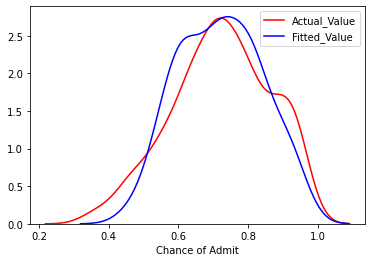

In [29]:
# Visualising the comparision between Actual and Predicted values
ax_1 = sns.distplot(admission_data["Chance of Admit"], hist = False, color = "r", label = "Actual_Value")
sns.distplot(y_pred, hist = False, color = "b", label = "Fitted_Value", ax = ax_1)

In [32]:
# Function for calculating Adjusted R-square
def adj_r2(x,y):
    r2 = best_param_ridge_reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adjusted_r2

In [33]:
# Model Evaluation using R-square 
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_pred)))

# Model Evaluation using Adjusted R-square
print('Adjusted R^2 train: %.3f, test: %.3f' %(adj_r2(X_train,y_train),adj_r2(X_test,y_test)))

R^2 train: 0.799, test: 0.792
Adjusted R^2 train: 0.795, test: 0.776


### Ridge Regression------Grid SearchCV

In [21]:
# Hyperparameter optimization using Grid Search CV
ridge_reg_gridcv = GridSearchCV(estimator = ridge_reg, param_grid = param_grid, n_jobs = -1)
#----Parameter grid being passed for performing hyperparameter optimization

In [22]:
# Fitting the model
ridge_reg_gridcv.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(normalize=True), n_jobs=-1,
             param_grid={'alpha': array([5.06215257, 8.01704697, 4.97613338, 0.49751886, 5.93324007,
       3.54894159, 9.44854443, 3.52432356, 9.13832686, 9.53842016,
       5.41132022, 8.66359693, 9.61808928, 8.01552353, 4.35620065,
       0.22828793, 0.87698539, 0.59854605, 7.21001656, 9.8821913 ,
       9.38855262, 7.16150188, 6.72597018, 7.00314946, 8.731...,
       9.66310343, 1.32719773, 1.15445875, 7.5224515 , 7.71321082,
       2.48405826, 2.38548994, 4.71283995, 1.97399403, 9.32472471,
       0.15107601, 9.30995377, 5.04468826, 3.31686856, 4.30158128,
       7.05883564, 8.99885357, 2.28424602, 5.0530496 , 2.59553717,
       1.32083642, 7.53453661, 8.394424  , 2.58831009, 5.57012035]),
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'sparse_cg', 'sag']})

In [23]:
# Finding the best parameter after performing hyperparameter tuning
ridge_reg_gridcv.best_params_

{'alpha': 0.15107600834871504, 'fit_intercept': True, 'solver': 'svd'}

In [24]:
# Passing the best parameter to Ridge Regression for model building
best_param_ridge_reg_gridcv = Ridge(alpha = 0.15107600834871504, normalize = True, solver = "svd", fit_intercept = True)

# Fitting the model after hyperparameter optimization
best_param_ridge_reg_gridcv.fit(X_train, y_train)

Ridge(alpha=0.15107600834871504, normalize=True, solver='svd')

In [25]:
# Finding out the slope and intercept terms after fiting the model
print("Slope: %.3f" %best_param_ridge_reg_gridcv.coef_[0]) #----Slope
print("Intercept: %.3f" %best_param_ridge_reg_gridcv.intercept_) #----Intercept

Slope: 0.002
Intercept: -1.168


In [26]:
# Prediction
y_pred_gridcv = best_param_ridge_reg_gridcv.predict(X_test)#----Prediction on testing set
y_train_pred_gridcv = best_param_ridge_reg_gridcv.predict(X_train)#----Prediction on training set

In [34]:
# Creating a new dataframe having actual and predicted values
comp_df_gridcv = pd.DataFrame({"Actual" : y_test, "Predicted" : y_pred_gridcv})
comp_df_gridcv.head()
#---Used for comparision purpose

,Actual,Predicted
7,0.68,0.606555
11,0.84,0.837233
16,0.66,0.708501
17,0.65,0.680847
33,0.90,0.924245


<AxesSubplot:xlabel='Chance of Admit'>

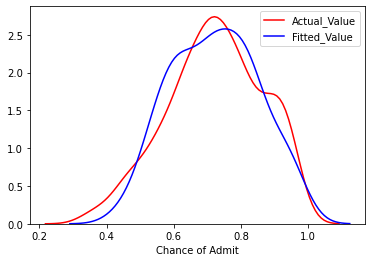

In [35]:
# Visualising the comparision between Actual and Predicted values
ax_2 = sns.distplot(admission_data["Chance of Admit"], hist = False, color = "r", label = "Actual_Value")
sns.distplot(y_pred_gridcv, hist = False, color = "b", label = "Fitted_Value", ax = ax_2)

In [36]:
# Function for calculating Adjusted R-square
def adj_r2(x,y):
    r2 = best_param_ridge_reg_gridcv.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adjusted_r2

In [38]:
# Model Evaluation using R-square 
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred_gridcv),r2_score(y_test, y_pred_gridcv)))

# Model Evaluation using Adjusted R-square
print('Adjusted R^2 train: %.3f, test: %.3f' %(adj_r2(X_train,y_train),adj_r2(X_test,y_test)))

R^2 train: 0.815, test: 0.805
Adjusted R^2 train: 0.812, test: 0.791
